# Работа с библиотекой PyWavelets: непрерывное всплеск-преобразование

Установить библиотеку `PyWavelets` можно командой:

    pip install PyWavelets

Существует множество различных семейств систем всплесков. Основное отличие в  размере носителя и гладкости. На практике нужно стремиться выбирать то семейство всплесков, которое лучше всего соответствует функциям в нашем сигнале.

Выведем различные семейства систем всплесков.

In [1]:
import pywt
import matplotlib.pyplot as plt

print(pywt.families(short=False))
print(pywt.families(short=True))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']
['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


Внутри каждого семейства всплесков есть несколько функций, которые порождают различные системы всплесков из этого семейства. Как правило, они отличаются по количеству обнуляющихся моментов или по размеру носителя.

Ниже приведена возможность получить названия всех систем всплесков в семействе.

In [3]:
db_wavelets = pywt.wavelist('db')
print(db_wavelets)
gaus_wavelets = pywt.wavelist('gaus')
print(gaus_wavelets)

['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']
['gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8']


Получить всплеск-функцию для непрерывного всплеск-преобразования (НВП) и её свойств можно командой

    wavelet = pywt.ContinuousWavelet(waveletname)

Получить отсчёты для построения графика всплеск-функции можно командой:

    psi_function, x_values = wavelet.wavefun()

ContinuousWavelet gaus5
  Family name:    Gaussian
  Short name:     gaus
  Symmetry:       anti-symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False


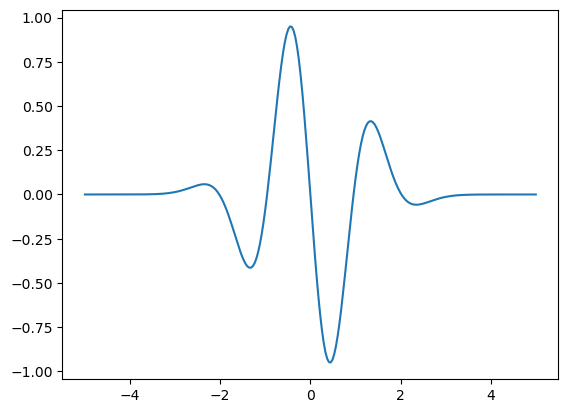

In [3]:
wavelet = pywt.ContinuousWavelet('gaus5')
print(wavelet)
psi_function, x_values = wavelet.wavefun()
plt.plot(x_values, psi_function)

Выведем графики некоторых всплеск-функций для НВП.

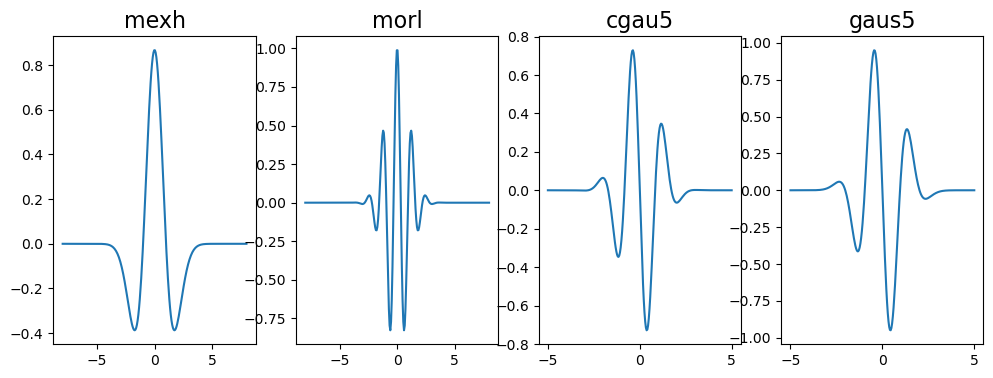

In [31]:
# Непрерывные всплески
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,4))
for ind, waveletname in enumerate(continuous_wavelets):
    wavelet = pywt.ContinuousWavelet(waveletname)
    psi_function, x_values = wavelet.wavefun()
    ax[ind].plot(x_values, psi_function)
    ax[ind].set_title("{}".format(waveletname), fontsize=16)

### Непрерывное всплеск-преобразование

НВП можно проделать командой

    pywt.cwt(data, scales, wavelet)

здесь `data` - это сигнал, `scales` - это набор масштабов, для которых надо проделать НВП (то есть набор значений для параметра $a$),
`wavelet` - это название всплеск-функции, которая будет использоваться для НВП.

Для перевода набора маштабов `scales` в набор соответствующих частот, можно использовать команду

    freqs = pywt.scale2frequency(wavelet, scales) / sampling_period

здесь `sampling_period` - это период дискретизации сигнала $T_s$.

Набор масштабов удобно формировать в лог-шкале. Для этого можно использовать метод из библиотеки `NumPy`.

    np.geomspace(start, stop, num)

где в аргументах указаны начальный масштаб, конечный масштаб и количество генерируемых точек (по сути генерируется геометрическая прогрессия).

In [5]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# генерация сигнала
w = 4 # частота
t = np.linspace(0, 5, 500, endpoint=False) # временные отсчёты
data = np.sin(2*np.pi*w*t) # сигнал

ts = np.diff(t)[0] # T_s
scales = np.geomspace(0.1, 500, num=100) # набор масштабов

scalogram, freqs = pywt.cwt(data, scales, 'gaus3', sampling_period = ts)

Шкалограмма возвращается первым аргументов (это матрица размера $\# scales \times \# data$), а во втором аргументе находится набор частот, которые формируются из масштабов по формуле выше.

In [3]:
print("Масштабы:", scales[0:5])
print("Частоты:", freqs[0:5])

Масштабы: [0.1        0.10898415 0.11877545 0.12944641 0.14107606]
Частоты: [400.         367.02585408 336.7699439  309.00819072 283.53498779]


In [4]:
f_Hz = pywt.scale2frequency('gaus3', scales) / ts
print("Частоты:", f_Hz[0:5])

Частоты: [400.         367.02585408 336.7699439  309.00819072 283.53498779]


In [5]:
print("Размер шкалограммы:", scalogram.shape)

Размер шкалограммы: (100, 500)


Визуализировать матрицу шкалограммы можно командой `plt.matshow()`.

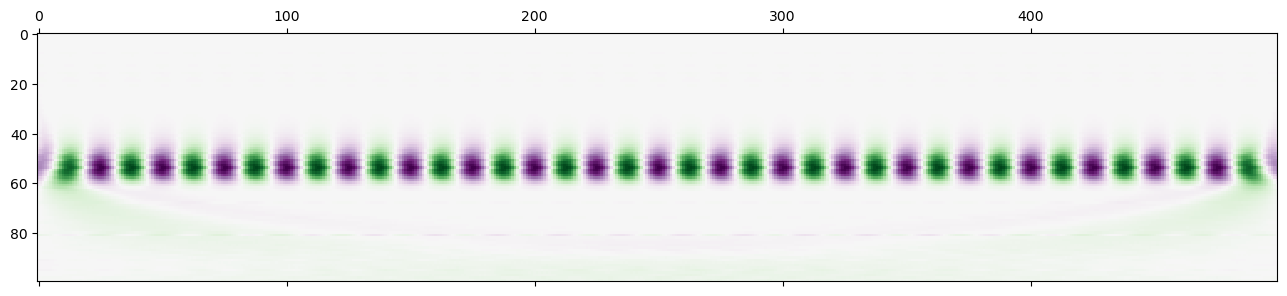

In [8]:
plt.matshow(scalogram, cmap='PRGn') 
plt.show() 

По оси $Oy$ отмечены просто индексы от 0 до 100. Чтобы нанести соответствующие частоты, можно использовать `plt.yticks()`.

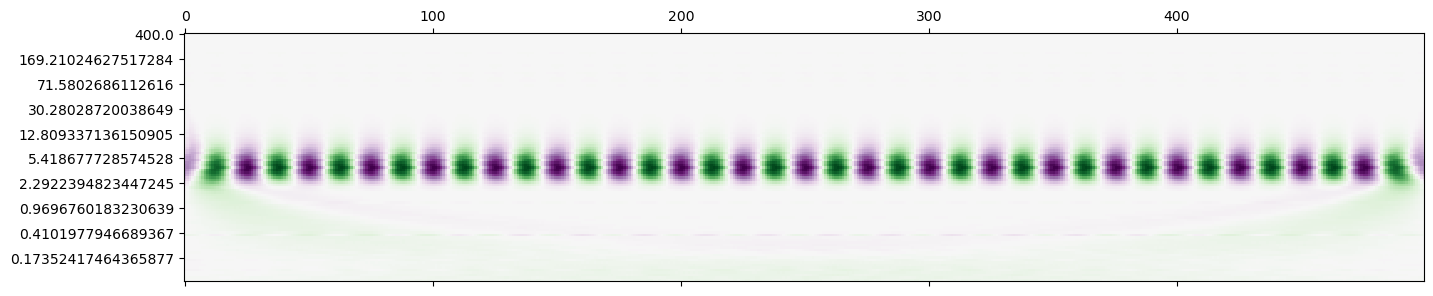

In [92]:
plt.matshow(scalogram, cmap='PRGn') 
plt.yticks(np.arange(0,100,10), freqs[0:100:10])
plt.show() 

Ниже объединим весь код в одну ячейку.

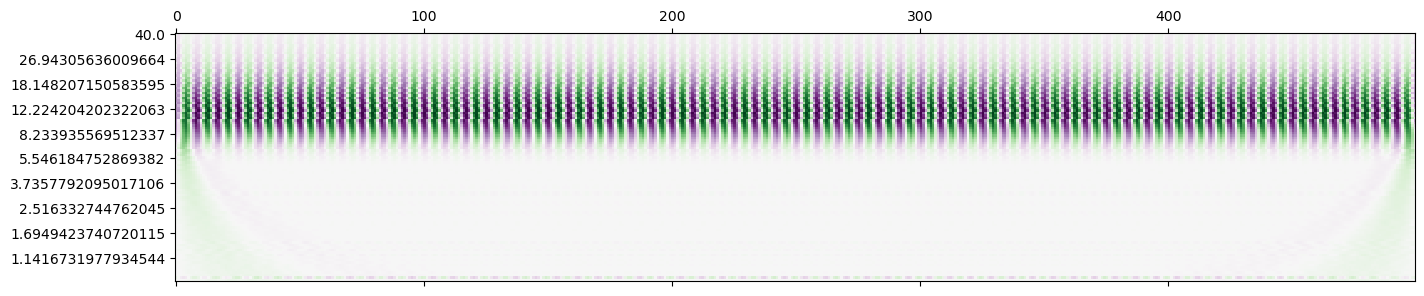

In [9]:
w = 12 # частота
t = np.linspace(0, 5, 500, endpoint=False) # временные отсчёты
data = np.sin(2*np.pi*w*t) # сигнал

ts = np.diff(t)[0] # T_s
scales = np.geomspace(1, 50, num=100) # набор масштабов

scalogram, freqs = pywt.cwt(data, scales, 'gaus3', sampling_period = ts)

plt.matshow(scalogram, cmap='PRGn') 
plt.yticks(np.arange(0,100,10), freqs[0:100:10])
plt.show() 

Рассмотрим НВП для другого сигнала.

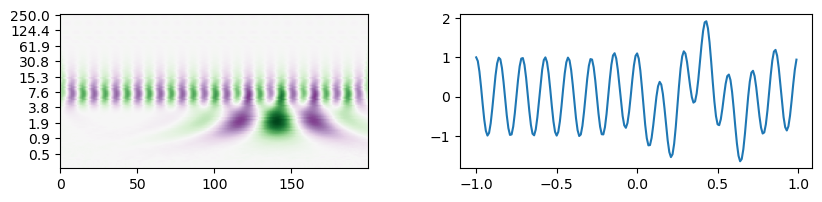

In [119]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-1, 1, 200, endpoint=False)
data  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))

ts = np.diff(t)[0] # T_s
scales = np.geomspace(0.1, 100, num=100) # набор масштабов

scalogram, freqs = pywt.cwt(data, scales, 'mexh', sampling_period = ts)

fig = plt.figure(figsize=(10, 2))

plt.subplot(1, 2, 1)
plt.imshow(scalogram, cmap='PRGn', vmax=abs(scalogram).max(), vmin=-abs(scalogram).max())  
plt.yticks(np.arange(0,100,10), np.round(freqs[0:100:10],1))

plt.subplot(1, 2, 2)
plt.plot(t,data)

plt.show() 

Рассмотрим сигнал, частота которого меняется с течением времени. Наиболее простым таким сигналом является чирп-сигнал:

$$
f(t) = \sin (2 \pi \cdot \phi(t) \cdot t),
$$
где $\phi(t)$ - это правило изменения частоты.

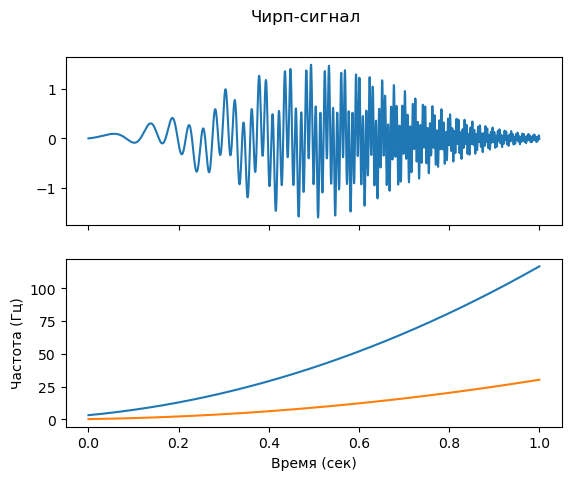

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pywt


def gaussian(x, x0, sigma):
    return np.exp(-np.power((x - x0) / sigma, 2.0) / 2.0)

def make_chirp(t, t0, a):
    frequency = (a * (t + t0)) ** 2
    chirp = np.sin(2 * np.pi * frequency * t)
    return chirp, frequency


# генерация сигнала в виде комбинации двух чирпов
time = np.linspace(0, 1, 2000)
chirp1, frequency1 = make_chirp(time, 0.2, 9)
chirp2, frequency2 = make_chirp(time, 0.1, 5)
chirp = chirp1 + 0.6 * chirp2
chirp *= gaussian(time, 0.5, 0.2)


fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(time, chirp)
axs[1].plot(time, frequency1)
axs[1].plot(time, frequency2)
#axs[1].set_yscale("log")
axs[1].set_xlabel("Время (сек)")
axs[1].set_ylabel("Частота (Гц)")
plt.suptitle("Чирп-сигнал")
plt.show()

Проведём НВП и для сравнения найдём также ДПФ и ОПФ.

Text(0.5, 1.0, 'ДПФ')

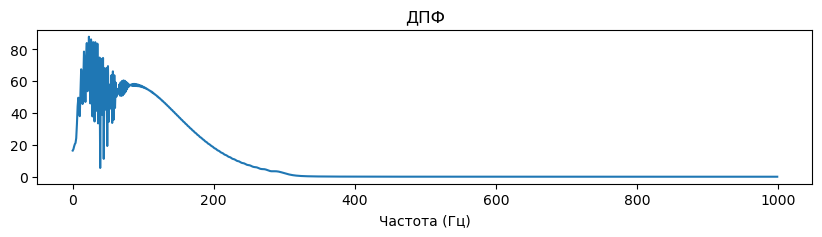

In [15]:
# ДПФ
from scipy.fftpack import fft, ifft, fftshift, fftfreq

ts = 1/2000.0

yf = np.abs(fft(chirp))
xf = fftfreq(len(chirp), d = ts)

plt.figure(figsize = (10,2))
plt.plot(xf[0:int(len(xf)/2)], np.abs(yf[:int(len(xf)/2)]))
plt.xlabel("Частота (Гц)")
plt.title("ДПФ")

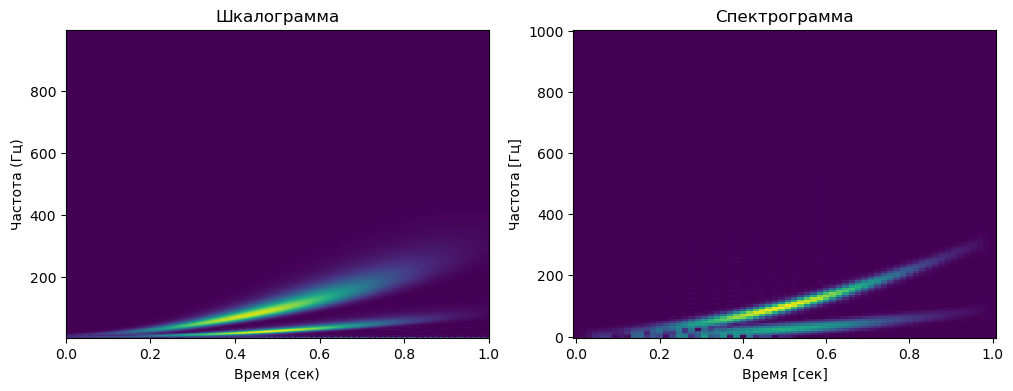

In [17]:
# НВП
wavelet = "cmor1.5-1.0"
scales = np.geomspace(2, 1024, num=1000)
ts = np.diff(time)[0]
scalogram, freqs = pywt.cwt(chirp, scales, wavelet, sampling_period=ts)
# берём модули, так как значения являются комплексными числами
scalogram = np.abs(scalogram[:-1, :-1])

fig, axs = plt.subplots(1, 2, figsize=(12,4))
# для отображения используем pcolormesh 
pcm = axs[0].pcolormesh(time, freqs, scalogram)
#axs[0].set_yscale("log")
axs[0].set_xlabel("Время (сек)")
axs[0].set_ylabel("Частота (Гц)")
axs[0].set_title("Шкалограмма")
#fig.colorbar(pcm, ax=axs[0])

# ОПФ, в версии 1.12 новый способ
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import hamming
win_size = 128
w = hamming(win_size)  
SFT = ShortTimeFFT(w, hop=int(win_size/4), fs=1/ts, mfft=256, scale_to='magnitude')
Sx = SFT.stft(chirp)  # perform the STFT


t_stft = np.linspace(0, 1, Sx.shape[1])
pcm2 = axs[1].pcolormesh(t_stft, SFT.f, np.abs(Sx)) 
axs[1].set_ylabel('Частота [Гц]')
axs[1].set_xlabel('Время [сек]')
axs[1].set_title('Спектрограмма');
#fig.colorbar(pcm2, ax=axs[1])

plt.show()

Добавим очень короткое колебание на высокой частоте.

In [24]:
adds_freq = np.zeros(len(time))
adds_freq[200:210:2] = 1
adds_freq[201:211:2] = -1
adds_freq[500:520] = np.sin(2 * np.pi * 400 * time[500:520])

adds_freq = np.zeros(len(time))
adds_freq[200], adds_freq[201] = 1, -1
chirp2 = chirp + adds_freq 

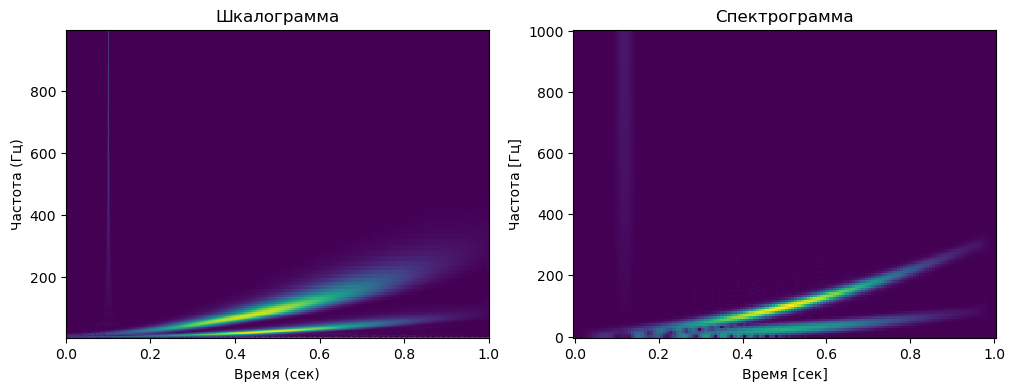

In [26]:
# НВП
wavelet = "cmor1.5-1.0"
scales = np.geomspace(2, 1024, num=100)
ts = np.diff(time)[0]
scalogram, freqs = pywt.cwt(chirp2, scales, wavelet, sampling_period=ts)
# берём модули, так как значения являются комплексными числами
scalogram = np.abs(scalogram[:-1, :-1])

fig, axs = plt.subplots(1, 2, figsize=(12,4))
# для отображения используем pcolormesh 
pcm = axs[0].pcolormesh(time, freqs, scalogram)
#axs[0].set_yscale("log")
axs[0].set_xlabel("Время (сек)")
axs[0].set_ylabel("Частота (Гц)")
axs[0].set_title("Шкалограмма")
#fig.colorbar(pcm, ax=axs[0])

# ОПФ, в версии 1.12 новый способ
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import hamming
win_size = 128
w = hamming(win_size)  # symmetric Gaussian window
SFT = ShortTimeFFT(w, hop=int(win_size/8), fs=1/ts, mfft=256, scale_to='magnitude')
Sx = SFT.stft(chirp2)  # perform the STFT


t_stft = np.linspace(0, 1, Sx.shape[1])
pcm2 = axs[1].pcolormesh(t_stft, SFT.f, np.abs(Sx)) 
axs[1].set_ylabel('Частота [Гц]')
axs[1].set_xlabel('Время [сек]')
axs[1].set_title('Спектрограмма');
#fig.colorbar(pcm2, ax=axs[1])

plt.show()

НВП и ОПФ отделяют частоты чирпа друг от друга. При добавлении дополнительных фраментов сигнала, НВП имеет более хорошую временную локализацию, чем ОПФ. 

Для разных всплеск-функций будет получаться различный результат.

In [33]:
def plot_wavelet(time, data, wavelet, title, ax):
    widths = np.geomspace(1, 1024, num=75)
    cwtmatr, freqs = pywt.cwt(
        data, widths, wavelet, sampling_period=np.diff(time).mean()
    )
    cwtmatr = np.abs(cwtmatr)
    pcm = ax.pcolormesh(time, freqs, cwtmatr)
    #ax.set_yscale("log")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(title)
    plt.colorbar(pcm, ax=ax)
    return ax

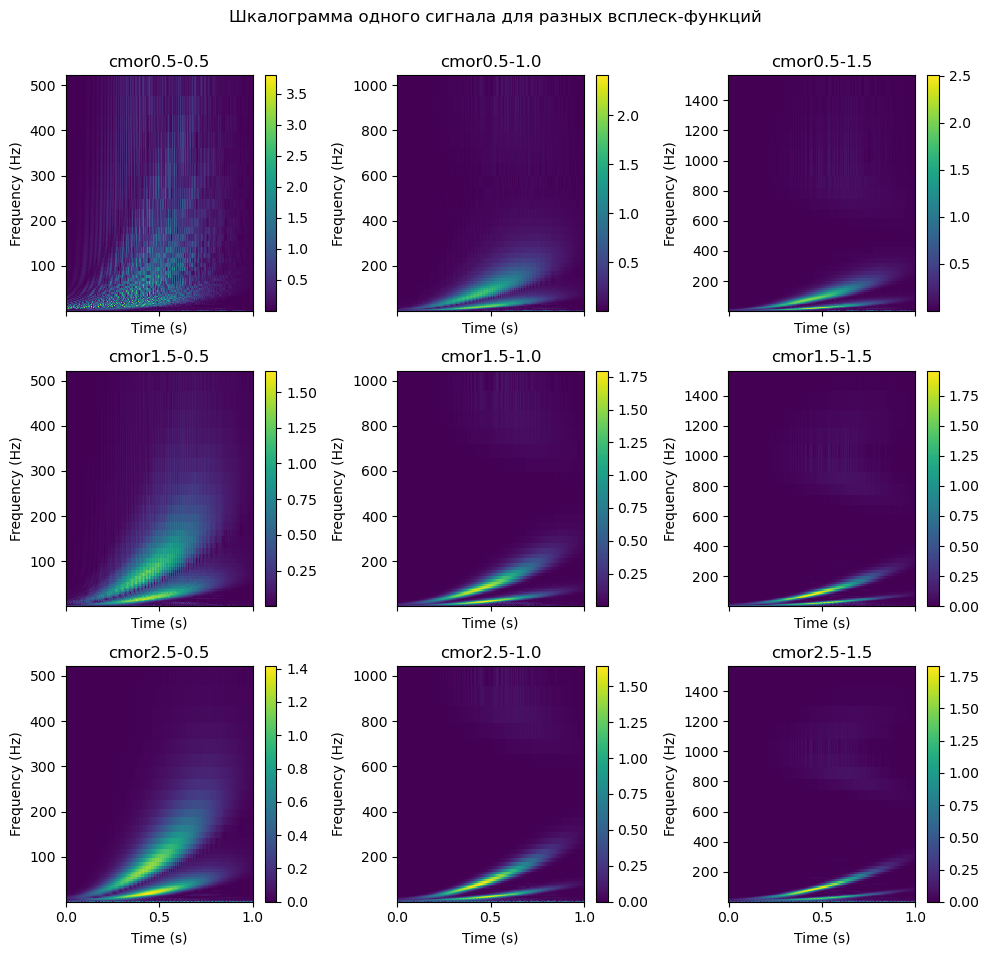

In [35]:
time = np.linspace(0, 1, 1000)
chirp1, frequency1 = make_chirp(time, 0.2, 9)
chirp2, frequency2 = make_chirp(time, 0.1, 5)
chirp = chirp1 + 0.6 * chirp2
chirp *= gaussian(time, 0.5, 0.2)

# НВП
wavelets = [f"cmor{x:.1f}-{y:.1f}" for x in [0.5, 1.5, 2.5] for y in [0.5, 1.0, 1.5]]
fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharex=True)
for ax, wavelet in zip(axs.flatten(), wavelets):
    plot_wavelet(time, chirp, wavelet, wavelet, ax)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Шкалограмма одного сигнала для разных всплеск-функций")
plt.show()